In [17]:
import pandas as pd
import numpy as np
import sklearn
np.random.seed(42)

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [19]:
def writeJson(json_path, data):
    '''Overwrite or add the infomation into original json file.

    PARAM:
    `json_path`: the path of the json file
    `data`: the data you wanna add or write in the form of dictionary
    '''
    if type(data) == dict:
        key_list = list(data.keys())
        try:
            with open(json_path, "r") as jsonFile:
                origin = json.load(jsonFile)
            for i in key_list:
                origin[i] = data[i]
            with open(json_path, 'w') as jsonFile:
                jsonObj = json.dumps(origin)
                jsonFile.write(jsonObj)
        except:
            with open(json_path, 'w') as jsonFile:
                jsonObj = json.dumps(data)
                jsonFile.write(jsonObj)
    elif type(data) == list:
        with open(json_path, 'w') as jsonFile:
            jsonObj = json.dumps(data)
            jsonFile.write(jsonObj)

In [20]:
raw_movies = pd.read_csv("dataset/raw_data.csv")
raw_movies.head()

,Unnamed: 0,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,senti_director,count_director,senti_actor,count_actor,senti_comment
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,2009.0,936.0,7.9,1.78,33000,0.171308,120.0,0.107394,20.0,0.182644
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,2007.0,5000.0,7.1,2.35,0,0.062750,20.0,0.078728,462.0,0.151764
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,2015.0,393.0,6.8,2.35,85000,0.198971,420.0,0.111401,494.0,0.141950
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2012.0,23000.0,8.5,2.35,164000,0.112011,500.0,0.089904,496.0,0.101435
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,12.0,7.1,NaN,0,NaN,NaN,NaN,NaN,-0.003392


In [21]:
len(raw_movies)
train_data = raw_movies.copy()
# change the genres to data
# cut the genres
genres_n = pd.Series(train_data.genres)
genres_n = genres_n.str.split('|')
genres_n = genres_n.str.get(0)
train_data['genres'] = genres_n
train_data.head()

,Unnamed: 0,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,senti_director,count_director,senti_actor,count_actor,senti_comment
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,2009.0,936.0,7.9,1.78,33000,0.171308,120.0,0.107394,20.0,0.182644
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,2007.0,5000.0,7.1,2.35,0,0.062750,20.0,0.078728,462.0,0.151764
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,2015.0,393.0,6.8,2.35,85000,0.198971,420.0,0.111401,494.0,0.141950
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2012.0,23000.0,8.5,2.35,164000,0.112011,500.0,0.089904,496.0,0.101435
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,12.0,7.1,NaN,0,NaN,NaN,NaN,NaN,-0.003392


In [22]:
# get the avg
senti_avg = train_data['senti_director'].mean()

senti_avg_actor = train_data['senti_actor'].mean()

comment_avg = train_data['senti_comment'].mean()
# fill the missing data
train_data['senti_director'] = train_data['senti_director'].replace(np.nan, senti_avg)
# train_data['count_director'] = train_data['count_director'].replace(np.nan, count_avg)
train_data['senti_actor'] = train_data['senti_actor'].replace(np.nan, senti_avg_actor)
# train_data['count_actor'] = train_data['count_actor'].replace(np.nan, count_avg_actor)
train_data['senti_comment'] = train_data['senti_comment'].replace(np.nan, comment_avg)
train_data.head()

,Unnamed: 0,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,senti_director,count_director,senti_actor,count_actor,senti_comment
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,2009.0,936.0,7.9,1.78,33000,0.171308,120.0,0.107394,20.0,0.182644
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,2007.0,5000.0,7.1,2.35,0,0.062750,20.0,0.078728,462.0,0.151764
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,2015.0,393.0,6.8,2.35,85000,0.198971,420.0,0.111401,494.0,0.141950
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2012.0,23000.0,8.5,2.35,164000,0.112011,500.0,0.089904,496.0,0.101435
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,12.0,7.1,NaN,0,0.110234,NaN,0.132119,NaN,-0.003392


/Users/zavierlyu/.local/share/virtualenvs/box-office-predictor-gnJ5DAWq/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


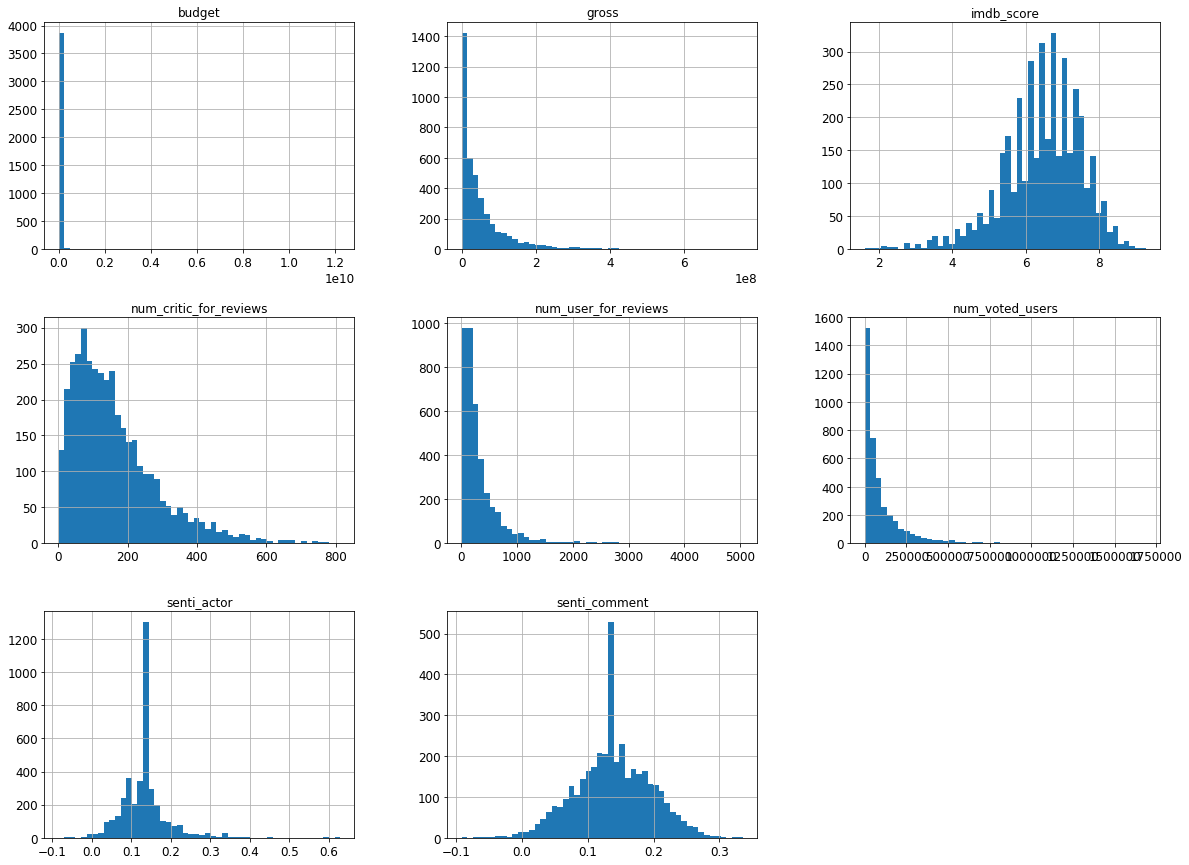

In [23]:
movies = train_data[["gross", "budget", "country", "genres", 'imdb_score', 'senti_comment', "num_voted_users",  'num_user_for_reviews', 'num_critic_for_reviews',  'senti_actor']]
movies.dropna(inplace=True)
movies.reset_index(drop=True)
# movies["log_budget"] = np.log(movies["budget"])
movies.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movies, test_size=0.2, random_state=42)

In [25]:
train_set.head()

,gross,budget,country,genres,imdb_score,senti_comment,num_voted_users,num_user_for_reviews,num_critic_for_reviews,senti_actor
2793,15171475.0,8500000.0,USA,Fantasy,5.7,0.138695,19805,122.0,73.0,0.221305
1181,293501675.0,40000000.0,USA,Drama,8.1,0.129429,704766,2073.0,234.0,0.036719
1255,37101011.0,40000000.0,USA,Comedy,5.8,0.132499,30394,103.0,147.0,0.127785
180,83024900.0,135000000.0,USA,Adventure,6.5,0.198079,62424,90.0,166.0,0.136740
289,97030725.0,100000000.0,USA,Biography,7.0,0.120571,230931,585.0,357.0,0.078728


In [26]:
train_set = train_set.reset_index(drop=True)
train_set["log_budget"] = np.log10(train_set["budget"])
train_set["log_gross"] = np.log10(train_set["gross"])
train_set.drop(["gross", "budget"], axis=1, inplace=True)
movies_tr_labels = train_set["log_gross"].copy()
movies_tr = train_set.drop("log_gross",axis=1)
movies_tr.head()

,country,genres,imdb_score,senti_comment,num_voted_users,num_user_for_reviews,num_critic_for_reviews,senti_actor,log_budget
0,USA,Fantasy,5.7,0.138695,19805,122.0,73.0,0.221305,6.929419
1,USA,Drama,8.1,0.129429,704766,2073.0,234.0,0.036719,7.602060
2,USA,Comedy,5.8,0.132499,30394,103.0,147.0,0.127785,7.602060
3,USA,Adventure,6.5,0.198079,62424,90.0,166.0,0.136740,8.130334
4,USA,Biography,7.0,0.120571,230931,585.0,357.0,0.078728,8.000000


## Pipeline

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["genres", "country"]
num_attribs = list(movies_tr.drop(cat_attribs, axis=1))

print("num\n", num_attribs)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


movies_tr_preprocessing = full_pipeline.fit_transform(movies_tr) # Using the full data rather than train data
movies_tr_prepared = movies_tr_preprocessing

num
 ['imdb_score', 'senti_comment', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'senti_actor', 'log_budget']


In [96]:
from sklearn.externals import joblib
joblib.dump(full_pipeline, "./model_instance/pipeline.pkl")

['./model_instance/pipeline.pkl']

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(movies_tr_prepared, movies_tr_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.4)
elastic_net.fit(movies_tr_prepared, movies_tr_labels)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(movies_tr_prepared, movies_tr_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(movies_tr_prepared, movies_tr_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
from sklearn.model_selection import cross_val_score

def display_scores(model):
    scores = cross_val_score(model, movies_tr_prepared, movies_tr_labels, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    result_info = '''
    Scores: {scores}
    Mean: {mean}
    Standard deviation: {std}
    **********************************************
    '''.format(scores=rmse_scores, mean=rmse_scores.mean(), std=rmse_scores.std())
    print(result_info)
    return result_info

In [33]:
import json
def dump_results(**kargs):
    dit = {}
    for k,i in kargs.items():
        dit[k] = display_scores(i)
    writeJson("model_rmse_scores.json", dit)

dump_results(LinearRegression=lin_reg, ElasticNet=elastic_net, DecisionTree=tree_reg, RandomForest=forest_reg)


    Scores: [0.7286812  0.66652782 0.69528325 0.71767692 0.68805523]
    Mean: 0.6992448819298012
    Standard deviation: 0.021988843095966843
    **********************************************
    

    Scores: [0.75392762 0.67403425 0.70891176 0.73891272 0.72459361]
    Mean: 0.7200759932979373
    Standard deviation: 0.027443199345374893
    **********************************************
    

    Scores: [0.79273005 0.8177818  0.80015998 0.89973772 0.83434191]
    Mean: 0.8289502899642163
    Standard deviation: 0.03822421404722734
    **********************************************
    

    Scores: [0.64254504 0.63318302 0.60331479 0.63318117 0.61904169]
    Mean: 0.6262531418984179
    Standard deviation: 0.013708534681903658
    **********************************************
    


In [34]:
import datetime
timeStart = datetime.datetime.now()
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint           
param_distribs = [{
        'n_estimators': [5*(i+1) for i in range(20)],
        'max_features': [2*(i+1) for i in range(5)],
        'min_samples_leaf': [1,2,3,4],
        'oob_score':[True]}
]
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = GridSearchCV(forest_reg, param_grid=param_distribs,
                          cv=5, scoring='neg_mean_squared_error', n_jobs=3)
rnd_search.fit(movies_tr_prepared, movies_tr_labels)
timeEnd = datetime.datetime.now()
print(str(timeEnd-timeStart)) 

0:04:51.272895


In [35]:
np.sqrt(-rnd_search.best_score_)

0.5825432615502419

In [36]:
best_rnd_forest_model = rnd_search.best_estimator_ 

In [37]:
from sklearn.externals import joblib
joblib.dump(best_rnd_forest_model, "./model_instance/rnd_forest_log10_gross.pkl")

['./model_instance/rnd_forest_log10_gross.pkl']

In [45]:
from sklearn.externals import joblib
best_rnd_forest_model = joblib.load("./model_instance/rnd_forest_log10_gross.pkl")

In [46]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0]) + list(cat_encoder.categories_[1])
attributes = num_attribs + cat_one_hot_attribs
feature_importances = rnd_search.best_estimator_.feature_importances_
importances_vs_features=sorted(zip(feature_importances, attributes), reverse=True, key=lambda x:x[0])

In [47]:
importances_vs_features

[(0.21092078983727863, 'num_voted_users'),
 (0.1997787482352241, 'log_budget'),
 (0.19584500137078617, 'num_user_for_reviews'),
 (0.09409689483736342, 'num_critic_for_reviews'),
 (0.059418322837162287, 'senti_comment'),
 (0.05741381428717865, 'imdb_score'),
 (0.046001487666189306, 'senti_actor'),
 (0.03509604925445968, 'USA'),
 (0.011518500099819237, 'Action'),
 (0.010113270245300088, 'Drama'),
 (0.00758285260811244, 'Adventure'),
 (0.006885745839746409, 'Comedy'),
 (0.006596255984746786, 'Crime'),
 (0.006089128979361122, 'UK'),
 (0.0054610900596490045, 'France'),
 (0.003801979346151325, 'China'),
 (0.003575171084125006, 'Germany'),
 (0.003570897680009507, 'Horror'),
 (0.0035061960596889925, 'Biography'),
 (0.0033222648412384653, 'Documentary'),
 (0.002773183795416061, 'Spain'),
 (0.0027375169087522494, 'Thailand'),
 (0.0019547976503110926, 'Brazil'),
 (0.0019055208245399968, 'Canada'),
 (0.0016791196711032443, 'Animation'),
 (0.0014155653539836505, 'Norway'),
 (0.0012807858934843859, 

In [48]:
test_set_final = test_set.copy()
test_set_final = test_set_final[test_set_final["genres"].isin(movies_tr["genres"].tolist())]
test_set_final = test_set_final[test_set_final["country"].isin(movies_tr["country"].tolist())]
# test_set = test_set.reset_index(drop=True)
test_set_final["log_gross"] = np.log10(test_set_final["gross"])
test_set_final["log_budget"] = np.log10(test_set_final["budget"])
test_set_final.drop(["gross", "budget"], axis=1, inplace=True)
movies_te_labels = test_set_final["log_gross"].copy()
movies_te = test_set_final.drop("log_gross",axis=1)
movies_te.head()

,country,genres,imdb_score,senti_comment,num_voted_users,num_user_for_reviews,num_critic_for_reviews,senti_actor,log_budget
4812,USA,Musical,6.3,0.233823,4546,71.0,36.0,0.082328,5.578639
2540,USA,Comedy,7.3,0.138695,288451,438.0,84.0,0.316918,7.204120
2667,USA,Drama,7.9,0.248518,189032,560.0,153.0,0.051631,7.176091
2797,USA,Action,4.4,0.141154,38985,673.0,205.0,0.132119,7.041393
326,USA,Crime,7.5,0.017409,314033,1166.0,233.0,0.150532,8.000000


In [49]:
movies_te_prepared = full_pipeline.transform(movies_te) # Using the full data rather than train data
movies_te_predictions = best_rnd_forest_model.predict(movies_te_prepared)

In [50]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(movies_te_labels, movies_te_predictions)
final_rmse = np.sqrt(final_mse)

In [51]:
final_mse

0.35100325055858345

In [52]:
final_rmse

0.5924552730447957

In [97]:
pipeline = joblib.load("./model_instance/pipeline.pkl")

In [98]:
def show_some_predictions(model, X, Y):
    some_data = X.iloc[5:10]
    some_labels = Y.iloc[5:10]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))

In [99]:
show_some_predictions(best_rnd_forest_model_, movies_te, movies_te_labels)

Predictions:	 [4.56336627 8.04743558 7.96333699 7.31505604 7.78925645]
Labels:		 [4.39417140041513, 8.081413574069613, 7.914670838519946, 8.033142177060625, 7.905044608227964]


In [100]:
some_data = movies_te.iloc[1:2]
# some_labels = Y.iloc[5:10]

In [101]:
some_data_prepared

array([[0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [102]:
some_data

,country,genres,imdb_score,senti_comment,num_voted_users,num_user_for_reviews,num_critic_for_reviews,senti_actor,log_budget
2540,USA,Comedy,7.3,0.138695,288451,438.0,84.0,0.316918,7.20412
